In [1]:
import pandas as pd
import numpy as np

In [2]:
df_json = pd.read_json('/Users/abhinavyadav/Assigment/AI-Engg/Defi-Credit-Score/user-wallet-transactions.json')
df_json.to_csv('/Users/abhinavyadav/Assigment/AI-Engg/Defi-Credit-Score/transactions-data.csv', index=False)

In [3]:
df = pd.read_csv('/Users/abhinavyadav/Assigment/AI-Engg/Defi-Credit-Score/transactions-data.csv')

df.sample(5)

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
98852,{'$oid': '681acef5d6df53021cd47080'},0x05f54eaf83bb7cb628a6424beb527eed605ac610,polygon,aave_v2,0x7bf0da8b809f43fba51353be1456f05148016515730c...,0x7bf0da8b809f43fba51353be1456f05148016515730c...,2021-05-30 00:09:01,1622333341,deposit,"{'type': 'Deposit', 'amount': '350000000', 'as...",0,{'$date': '2025-05-07T03:09:42.634Z'},{'$date': '2025-05-07T03:09:42.634Z'}
29501,{'$oid': '681af378d6df53021ce10bcb'},0x01e156b9378aaaf9215cc50f0e6b1ead24fff6b0,polygon,aave_v2,0x8aeac6437e0a2eb864a30bda7b3459c675baf09a73dd...,0x8aeac6437e0a2eb864a30bda7b3459c675baf09a73dd...,2021-06-07 19:16:16,1623093376,borrow,"{'type': 'Borrow', 'amount': '1000000000000000...",0,{'$date': '2025-05-07T05:45:29.871Z'},{'$date': '2025-05-07T05:45:29.871Z'}
26155,{'$oid': '681abb5ad6df53021ccdeee0'},0x019ea1afabcbd84d922043c4261052a583315d2c,polygon,aave_v2,0x27c8acb71bab38b8e98f61e1a010b0288fa54c0761f5...,0x27c8acb71bab38b8e98f61e1a010b0288fa54c0761f5...,2021-05-25 23:38:12,1621985892,borrow,"{'type': 'Borrow', 'amount': '15000000000', 'a...",0,{'$date': '2025-05-07T01:46:04.209Z'},{'$date': '2025-05-07T01:46:04.209Z'}
61979,{'$oid': '681caea1d63812d4652ff120'},0x047a96ef72d7ee6a3f193bdb92e998fb300265df,polygon,aave_v2,0xe4af7c9edaaf7e828ff96cb95f17310a5b7d9c304d32...,0xe4af7c9edaaf7e828ff96cb95f17310a5b7d9c304d32...,2021-06-20 23:17:19,1624231039,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '200000...",0,{'$date': '2025-05-08T13:16:20.738Z'},{'$date': '2025-05-08T13:16:20.738Z'}
42417,{'$oid': '681aa3acd6df53021cc59f9e'},0x02f11fe7a88805f3afbe76f28d0ee7b090d4e99b,polygon,aave_v2,0x3da18f9d5f46d3a41c99b2ee50792bd3b3c552480f05...,0x3da18f9d5f46d3a41c99b2ee50792bd3b3c552480f05...,2021-05-19 13:28:26,1621430906,deposit,"{'type': 'Deposit', 'amount': '830000000000000...",0,{'$date': '2025-05-07T00:05:03.349Z'},{'$date': '2025-05-07T00:05:03.349Z'}


In [4]:
df.shape

(100000, 13)

In [5]:
batch_data = df[:100].to_csv('/Users/abhinavyadav/Assigment/AI-Engg/Defi-Credit-Score/batch-transactions-data.csv', index=False)


In [6]:
df.columns

Index(['_id', 'userWallet', 'network', 'protocol', 'txHash', 'logId',
       'timestamp', 'blockNumber', 'action', 'actionData', '__v', 'createdAt',
       'updatedAt'],
      dtype='object')

In [13]:
df['actionData'][0]

"{'type': 'Deposit', 'amount': '2000000000', 'assetSymbol': 'USDC', 'assetPriceUSD': '0.9938318274296357543568636362026045', 'poolId': '0x2791bca1f2de4661ed88a30c99a7a9449aa84174', 'userId': '0x00000000001accfa9cef68cf5371a23025b6d4b6'}"

In [14]:
import ast

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['actionData'] = df['actionData'].apply(ast.literal_eval)


df['amount'] = df['actionData'].apply(lambda x: float(x.get('amount', 0)))
df['asset'] = df['actionData'].apply(lambda x: x.get('asset', None))

columns_to_drop = ['_id', '__v', 'createdAt', 'updatedAt', 'logId', 'txHash', 'actionData', 'network', 'protocol']
df_cleaned = df.drop(columns=columns_to_drop)

# Preview cleaned DataFrame
df_cleaned.head()

,userWallet,timestamp,blockNumber,action,amount,asset
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,2021-08-17 05:29:26,1629178166,deposit,2.000000e+09,None
1,0x000000000051d07a4fb3bd10121a343d85818da6,2021-05-20 15:36:53,1621525013,deposit,1.450000e+20,None
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2021-07-24 09:28:33,1627118913,deposit,1.000000e+15,None
3,0x000000000096026fb41fc39f9875d164bd82e2dc,2021-07-31 23:15:18,1627773318,deposit,4.000000e+15,None
4,0x0000000000e189dd664b9ab08a33c4839953852c,2021-04-19 15:25:07,1618845907,redeemunderlying,5.015480e+05,None


In [24]:
df_cleaned['date'] = df_cleaned['timestamp'].dt.date

action_counts = df_cleaned.pivot_table(index='userWallet', 
                                       columns='action', 
                                       aggfunc='size', 
                                       fill_value=0)

amounts = df_cleaned.pivot_table(index='userWallet', 
                                 columns='action', 
                                 values='amount', 
                                 aggfunc='sum', 
                                 fill_value=0)

activity = df_cleaned.groupby('userWallet').agg(
    first_seen=('timestamp', 'min'),
    last_seen=('timestamp', 'max'),
    active_days=('date', lambda x: x.nunique()),
    txn_count=('timestamp', 'count')
)

wallet_features = pd.concat([action_counts, amounts.add_prefix('total_'), activity], axis=1)

wallet_features['active_span_days'] = (wallet_features['last_seen'] - wallet_features['first_seen']).dt.days + 1
wallet_features['txns_per_day'] = wallet_features['txn_count'] / wallet_features['active_span_days']

wallet_features.reset_index(inplace=True)
wallet_features.head()


,userWallet,borrow,deposit,liquidationcall,redeemunderlying,repay,total_borrow,total_deposit,total_liquidationcall,total_redeemunderlying,total_repay,first_seen,last_seen,active_days,txn_count,active_span_days,txns_per_day
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,0,1,0,0,0,0.000000e+00,2.000000e+09,0.0,0.000000e+00,0.000000e+00,2021-08-17 05:29:26,2021-08-17 05:29:26,1,1,1,1.000000
1,0x000000000051d07a4fb3bd10121a343d85818da6,0,1,0,0,0,0.000000e+00,1.450000e+20,0.0,0.000000e+00,0.000000e+00,2021-05-20 15:36:53,2021-05-20 15:36:53,1,1,1,1.000000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,0,2,0,0,0,0.000000e+00,5.000000e+15,0.0,0.000000e+00,0.000000e+00,2021-07-24 09:28:33,2021-07-31 23:15:18,2,2,8,0.250000
3,0x0000000000e189dd664b9ab08a33c4839953852c,0,0,0,17,0,0.000000e+00,0.000000e+00,0.0,4.835297e+18,0.000000e+00,2021-04-19 15:23:17,2021-08-26 23:15:16,8,17,130,0.130769
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,15,250,0,130,4,3.946000e+22,9.459366e+22,0.0,3.946556e+22,7.002457e+10,2021-04-21 21:28:30,2021-09-01 18:15:24,104,399,133,3.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

wallet_features.fillna(0, inplace=True)

wallet_features['repay_to_borrow_ratio'] = wallet_features['total_repay'] / (wallet_features['total_borrow'] + 1)
wallet_features['redeem_to_deposit_ratio'] = wallet_features['total_redeemunderlying'] / (wallet_features['total_deposit'] + 1)

scoring_features = [
    'deposit', 'repay', 'borrow', 'redeemunderlying',
    'total_deposit', 'total_repay', 'total_borrow',
    'repay_to_borrow_ratio', 'redeem_to_deposit_ratio',
    'active_days', 'txns_per_day'
]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(wallet_features[scoring_features])

weights = np.array([0.1, 0.15, -0.1, -0.05, 0.1, 0.2, -0.1, 0.15, 0.1, 0.1, 0.15])
wallet_features['raw_score'] = scaled @ weights

wallet_features['credit_score'] = MinMaxScaler(feature_range=(0, 1000)).fit_transform(wallet_features[['raw_score']])

wallet_features[['userWallet', 'credit_score']].to_csv('wallet_scores.csv', index=False)


- predicting score

In [22]:
import pandas as pd

df_scores = pd.read_csv("wallet_scores.csv")

wallet = "0x0000000002032370b971dabd36d72f3e5a7bf1ee"

score = df_scores[df_scores["userWallet"] == wallet]["credit_score"]

print(f"Credit Score for {wallet}: {score.values[0]}")


Credit Score for 0x0000000002032370b971dabd36d72f3e5a7bf1ee: 535.5329837658836


/var/folders/7t/n462s2b57s7c6mrh4_0cmrq40000gn/T/ipykernel_81515/2808002386.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bucket_counts.index, y=bucket_counts.values, palette="viridis")


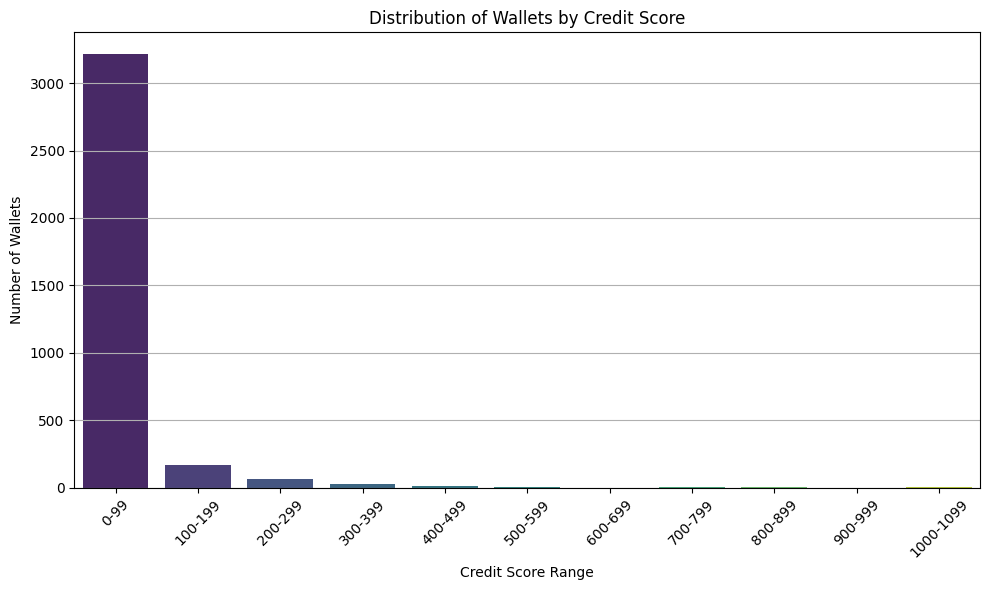

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wallet_scores = pd.read_csv("wallet_scores.csv")

bins = list(range(0, 1101, 100))
labels = [f"{i}-{i+99}" for i in bins[:-1]]
wallet_scores["score_bucket"] = pd.cut(wallet_scores["credit_score"], bins=bins, labels=labels, right=False)

bucket_counts = wallet_scores["score_bucket"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=bucket_counts.index, y=bucket_counts.values, palette="viridis")
plt.xlabel("Credit Score Range")
plt.ylabel("Number of Wallets")
plt.title("Distribution of Wallets by Credit Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("score_distribution.png")


In [ ]:
# Display the exact number of wallets classified in each credit score group (bucket)
import pandas as pd
wallet_scores = pd.read_csv("wallet_scores.csv")
bins = list(range(0, 1101, 100))
labels = [f"{i}-{i+99}" for i in bins[:-1]]
wallet_scores["score_bucket"] = pd.cut(wallet_scores["credit_score"], bins=bins, labels=labels, right=False)
bucket_counts = wallet_scores["score_bucket"].value_counts().sort_index()
print(bucket_counts)